## 1. Load Required Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils
import pandas as pd
import numpy as np

C:\Users\nahar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Load Configuration File

In [3]:
config = utils.load_config()

## 3. Load Train Set

In [4]:
x_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [5]:
train_set = pd.concat([x_train, y_train], axis = 1)

## 4. Data Exploration

### 4.1. Quick look dataset

In [6]:
# Quick take a loof to our train data
train_set

,Company,TypeName,OpSys,Cpu,Inches,Ram,Memory,Gpu,Weight,ScreenResolution,HDD,SSD,Hybrid,Flash_Storage,Price
1158,Lenovo,Notebook,Windows 10,Intel Core i5 6200U 2.3GHz,15.6,8GB,1000 Hybrid,AMD Radeon R5 M330,2.5kg,Full HD 1920x1080,0,0,1000,0,42010.7472
904,Lenovo,Notebook,Windows 10,Intel Core i5 7200U 2.5GHz,15.6,8GB,512 SSD,Intel HD Graphics 620,1.95kg,IPS Panel Full HD 1920x1080,0,512,0,0,104588.1072
439,Asus,Notebook,Linux,Intel Core i5 7200U 2.5GHz,15.6,4GB,256 SSD,Intel HD Graphics 620,2kg,Full HD 1920x1080,0,256,0,0,29783.5200
581,Dell,Notebook,Windows 10,Intel Core i5 7300U 2.6GHz,15.6,8GB,500 HDD,Intel HD Graphics 620,1.9kg,1366x768,500,0,0,0,53733.9456
676,Asus,Ultrabook,Windows 10,Intel Core i5 7200U 2.5GHz,14.0,8GB,256 SSD,Intel HD Graphics 620,1.1kg,Full HD 1920x1080,0,256,0,0,60472.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,Windows 10,Intel Core i5 7200U 2.5GHz,15.6,8GB,256 SSD + 1000 HDD,Nvidia GeForce GTX 950M,2.4kg,Full HD 1920x1080,1000,256,0,0,42570.7200
1130,HP,Notebook,Windows 10,Intel Core i7 7500U 2.7GHz,15.6,8GB,2000 HDD,Intel HD Graphics 620,2.04kg,1366x768,2000,0,0,0,33513.1200
1294,HP,Notebook,Windows 10,AMD A9-Series 9410 2.9GHz,15.6,6GB,1000 Hybrid,AMD Radeon R7 M440,2.04kg,Full HD 1920x1080,0,0,1000,0,29303.4672
860,Lenovo,Notebook,Windows 10,Intel Core i5 7200U 2.5GHz,15.6,8GB,1000 HDD,Intel HD Graphics 620,2.3kg,IPS Panel Full HD 1920x1080,1000,0,0,0,45323.1648


In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 1158 to 1126
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   TypeName          912 non-null    object 
 2   OpSys             912 non-null    object 
 3   Cpu               912 non-null    object 
 4   Inches            912 non-null    float64
 5   Ram               912 non-null    object 
 6   Memory            912 non-null    object 
 7   Gpu               912 non-null    object 
 8   Weight            912 non-null    object 
 9   ScreenResolution  912 non-null    object 
 10  HDD               912 non-null    int64  
 11  SSD               912 non-null    int64  
 12  Hybrid            912 non-null    int64  
 13  Flash_Storage     912 non-null    int64  
 14  Price             912 non-null    float64
dtypes: float64(2), int64(4), object(9)
memory usage: 114.0+ KB


- We see most of the type of columns is object or written in string format
- However there are some columns that are numerics but the string in the columns make it as string e.g Weight (1.5 kg)

Columns Type
1. Categorical
    - Company
    - TypeName
    - OpSys
    - Cpu
    - Gpu
    - Touchscreen
    - IPS  
2. Numerical
    - Inches
    - Ram
    - HDD
    - SSD
    - Hybrid
    - Flash_Storage
    - Weight
    - Screen resolution (X and Y resolution)

In [6]:
# Columns name can be more simple, not a major problem

### 4.2. Label distribution

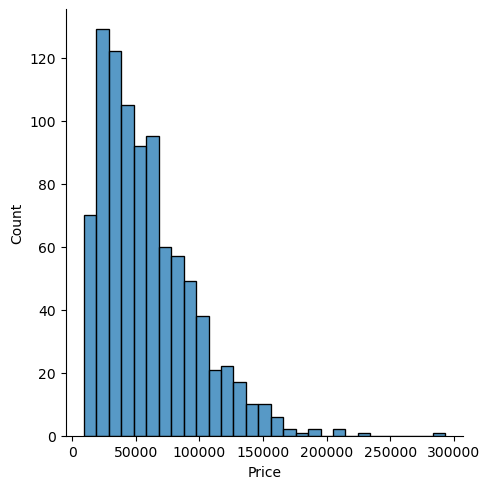

In [7]:
# Check distribution of our label data

ax = sns.displot(train_set[config["label"]])

### 4.3. Inches distribution

<AxesSubplot:xlabel='Inches', ylabel='Density'>

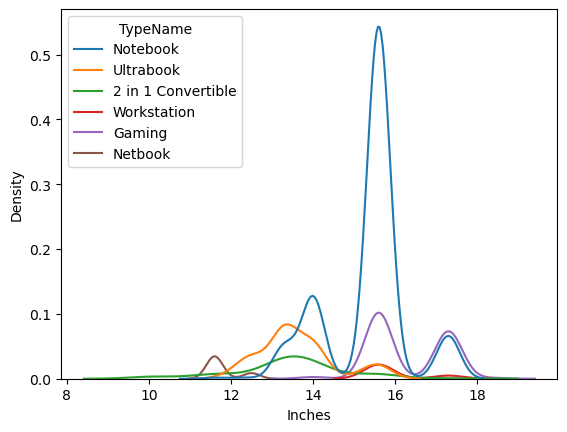

In [8]:
# Check distribution of temperature
sns.kdeplot(data = train_set, x = "Inches", hue = "TypeName")

### 4.4. RAM Distribution

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 1158 to 1126
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   TypeName          912 non-null    object 
 2   Inches            912 non-null    float64
 3   ScreenResolution  912 non-null    object 
 4   Cpu               912 non-null    object 
 5   Ram               912 non-null    object 
 6   Memory            912 non-null    object 
 7   Gpu               912 non-null    object 
 8   OpSys             912 non-null    object 
 9   Weight            912 non-null    object 
 10  Price             912 non-null    float64
dtypes: float64(2), object(9)
memory usage: 85.5+ KB


[Text(0, 0, '14'),
 Text(0, 0, '277'),
 Text(0, 0, '31'),
 Text(0, 0, '423'),
 Text(0, 0, '16'),
 Text(0, 0, '141'),
 Text(0, 0, '1'),
 Text(0, 0, '9')]

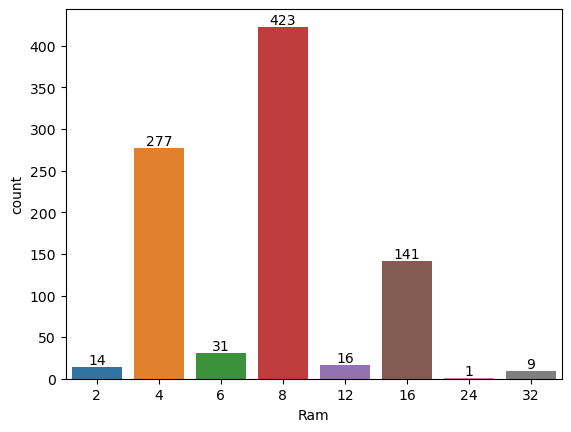

In [10]:
# Check distribution of our label data

train_set["Ram"] = train_set["Ram"].str.replace("GB","")
train_set["Ram"] = train_set["Ram"].astype("int")

ax = sns.countplot(data = train_set, x = "Ram", label = train_set["Ram"].unique())
ax.bar_label(ax.containers[0])

In [11]:
train_set["Company"].value_counts()

Lenovo       217
Dell         202
HP           189
Asus         109
Acer          75
Toshiba       38
MSI           36
Apple         17
Samsung        6
Razer          4
Vero           3
Chuwi          3
Mediacom       3
Microsoft      3
Google         2
Xiaomi         2
Huawei         1
LG             1
Fujitsu        1
Name: Company, dtype: int64

In [12]:
train_set["Cpu"].unique()

array(['Intel Core i5 6200U 2.3GHz', 'Intel Core i5 7200U 2.5GHz',
       'Intel Core i5 7300U 2.6GHz', 'AMD A10-Series A10-9620P 2.5GHz',
       'Intel Core i3 6006U 2.0GHz', 'Intel Core M M7-6Y75 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 7600U 2.8GHz',
       'Intel Core i7 6500U 2.5GHz', 'Intel Core M 6Y30 0.9GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'AMD E-Series 7110 1.8GHz', 'Intel Core i3 6100U 2.1GHz',
       'Intel Core i7 2.7GHz', 'Intel Core i7 7560U 2.4GHz',
       'Intel Core i3 7100U 2.4GHz',
       'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Celeron Quad Core N3450 1.1GHz',
       'AMD A9-Series A9-9420 3GHz', 'Intel Core i7 6820HQ 2.7GHz',
       'Intel Core i3 6100U 2.3GHz',
       'Intel Pentium Quad Core N3710 1.6GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 7820HK 2.9GHz',
   

In [14]:
train_set["Gpu"].value_counts()

Intel HD Graphics 620      192
Intel HD Graphics 520      134
Nvidia GeForce GTX 1050     48
Intel UHD Graphics 620      46
Nvidia GeForce 940MX        34
                          ... 
AMD Radeon Pro 555           1
AMD Radeon Pro 455           1
Nvidia GeForce GTX 965M      1
Nvidia Quadro M2200M         1
Intel HD Graphics 530        1
Name: Gpu, Length: 96, dtype: int64

In [15]:
train_set["Weight"].value_counts()

2.2kg     82
2.1kg     47
2.4kg     31
2.5kg     24
2kg       24
          ..
1.31kg     1
3.25kg     1
4kg        1
4.0kg      1
3.35kg     1
Name: Weight, Length: 159, dtype: int64

### 4.5. TypeName Distribution

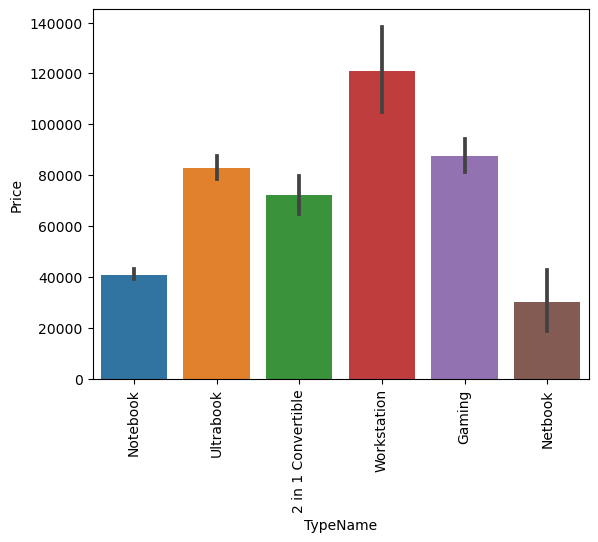

In [16]:
sns.barplot(x = train_set["TypeName"],y = train_set["Price"])
plt.xticks(rotation="vertical")
plt.show()

### 4.6. Weight Distribution

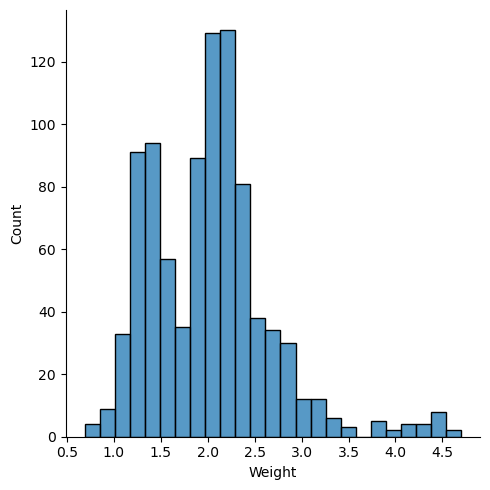

In [17]:
# Check distribution of our label data

train_set["Weight"] = train_set["Weight"].str.replace("kg","")
train_set["Weight"] = train_set["Weight"].astype("float")

ax = sns.displot(train_set["Weight"])

### 4.7. ScreenResolution

In [18]:
train_set["ScreenResolution"].value_counts()

Full HD 1920x1080                                348
1366x768                                         207
IPS Panel Full HD 1920x1080                      152
IPS Panel Full HD / Touchscreen 1920x1080         35
Full HD / Touchscreen 1920x1080                   30
1600x900                                          19
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   10
Touchscreen 1366x768                              10
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
IPS Panel 1366x768                                 6
Touchscreen 2560x1440                              6
4K Ultra HD / Touchscreen 3840x2160                5
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2560x1600                 5
1440x900                                           4
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
IPS Panel Retina Display 2304x1440                 4
IPS Panel Touchscreen 1920x1200               

<AxesSubplot:>

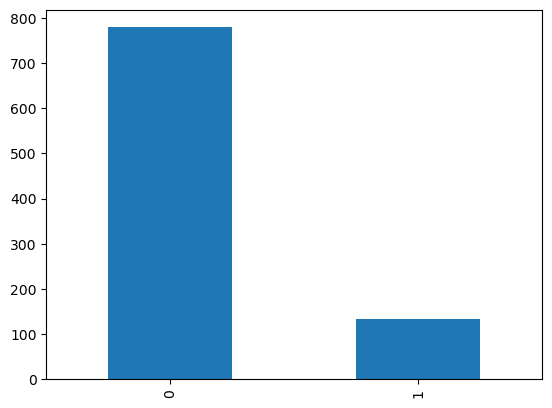

In [19]:
train_set["Touchscreen"] = train_set["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)
train_set["Touchscreen"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

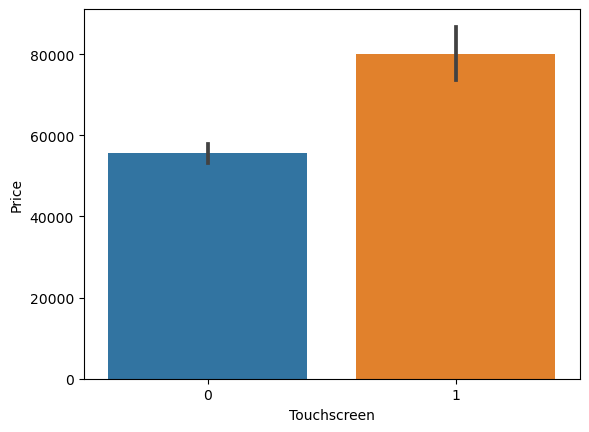

In [20]:
sns.barplot(x=train_set["Touchscreen"],y=train_set["Price"])

In [21]:
train_set["Ips"] = train_set["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

<AxesSubplot:xlabel='Ips', ylabel='Price'>

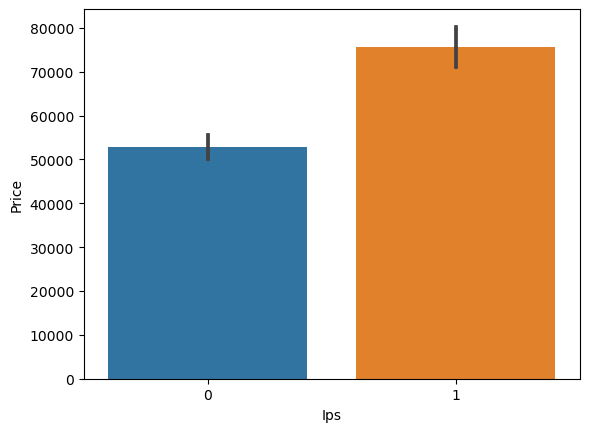

In [22]:
sns.barplot(x=train_set["Ips"],y=train_set["Price"])

In [23]:
temp = train_set["ScreenResolution"].str.split("x", n = 1, expand = True)
temp

,0,1
1158,Full HD 1920,1080
904,IPS Panel Full HD 1920,1080
439,Full HD 1920,1080
581,1366,768
676,Full HD 1920,1080
...,...,...
1095,Full HD 1920,1080
1130,1366,768
1294,Full HD 1920,1080
860,IPS Panel Full HD 1920,1080


In [24]:
train_set["X_res"] = temp[0]
train_set["Y_res"] = temp[1]

In [25]:
train_set["X_res"] = train_set["X_res"].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
train_set["X_res"]

1158    1920
904     1920
439     1920
581     1366
676     1920
        ... 
1095    1920
1130    1366
1294    1920
860     1920
1126    1920
Name: X_res, Length: 912, dtype: object

In [26]:
train_set["X_res"] = train_set["X_res"].astype("int")
train_set["Y_res"] = train_set["Y_res"].astype("int")

### 4.8. Operating System Distribution

In [27]:
train_set['OpSys'].value_counts()

Windows 10      741
No OS            48
Linux            45
Windows 7        34
Chrome OS        20
macOS            11
Mac OS X          6
Windows 10 S      5
Android           2
Name: OpSys, dtype: int64

In [28]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [29]:
train_set['os'] = train_set['OpSys'].apply(cat_os)

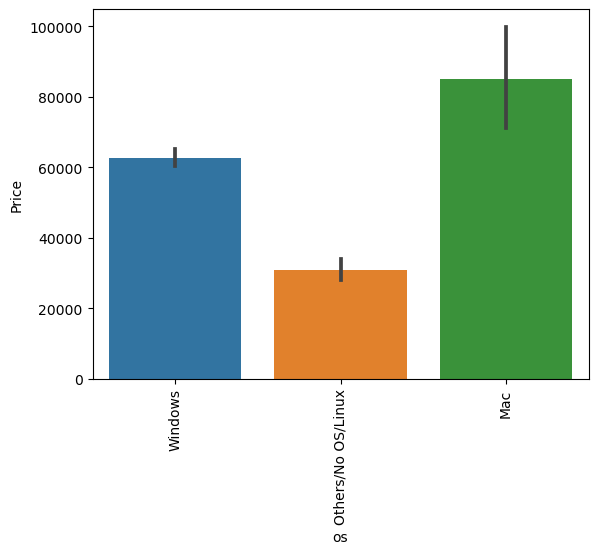

In [30]:
sns.barplot(x=train_set['os'],y=train_set['Price'])
plt.xticks(rotation='vertical')
plt.show()

### 4.9. CPU Distribution

<AxesSubplot:>

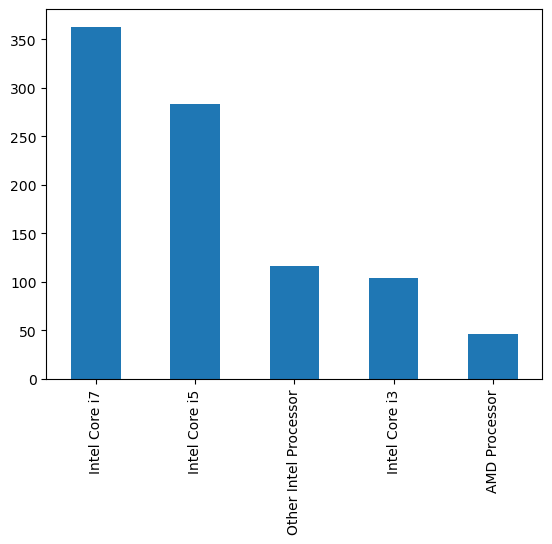

In [31]:
train_set['Cpu Name'] = train_set['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

train_set['Cpu brand'] = train_set['Cpu Name'].apply(fetch_processor)
train_set['Cpu brand'].value_counts().plot(kind='bar')

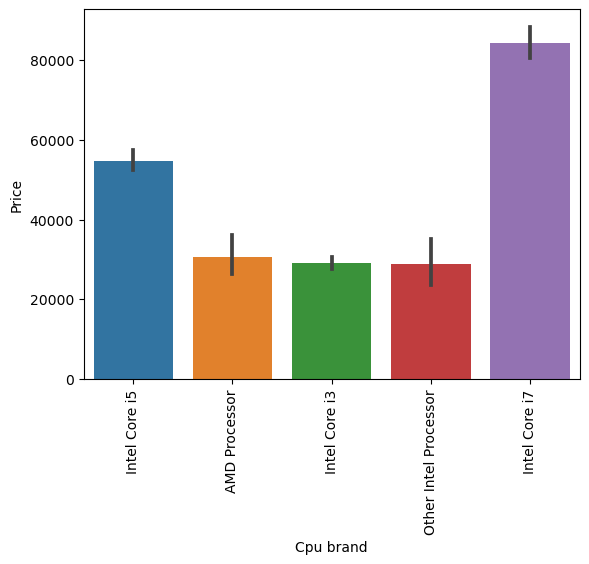

In [32]:
sns.barplot(x=train_set['Cpu brand'],y=train_set['Price'])
plt.xticks(rotation='vertical')
plt.show()

### 4.10. GPU Distribution

In [33]:
train_set['Gpu brand'] = train_set['Gpu'].apply(lambda x : x.split()[0])
train_set['Gpu brand'].value_counts()

Intel     512
Nvidia    268
AMD       131
ARM         1
Name: Gpu brand, dtype: int64

In [34]:
# There is only 1 row of ARM GPU so remove it

### 4.11. Cleaned Data

In [36]:
train_set.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'X_res', 'Y_res', 'os', 'Cpu Name', 'Cpu brand', 'Gpu brand'],
      dtype='object')

### 4.12. Pairplot

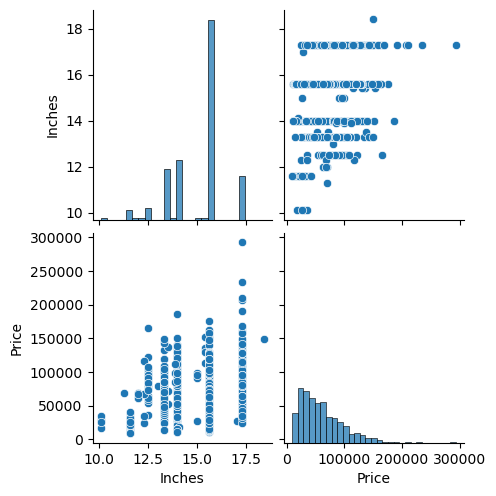

In [12]:
sns.pairplot(
    train_set[
        [
            "Inches",
            "Ram",
            "Weight",
            # "Touchscreen",
            # "Ips",
            # "X_res",
            # "Y_res",
            "Price"
        ]
        
    ]
)

C:\Users\nahar\AppData\Local\Temp\ipykernel_8560\1484385464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr(), annot = True)


<AxesSubplot:>

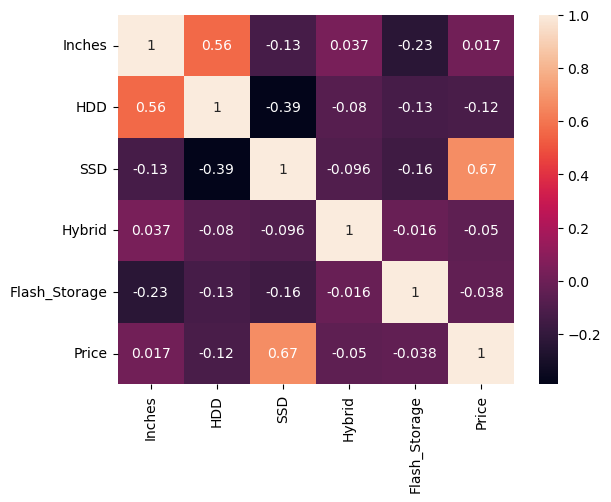

In [7]:
sns.heatmap(train_set.corr(), annot = True)